In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/nismayil/OneDrive - Texas Tech University/GeoStatistics/Final Project/global-data-on-sustainable-energy (1).csv')

In [3]:
df.head(20) # To visualize first 20 rows of the dataset 

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.20,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.20,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.20,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.0,0.59,...,252.06912,1.41,1549.999952,NaN,11.229715,242.031313,60,652230.0,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.0,0.64,...,304.42090,1.50,1759.999990,NaN,5.357403,263.733602,60,652230.0,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,7.25,15750000.0,28.78,0.20,0.0,0.75,...,354.27990,1.53,1769.999981,NaN,13.826320,359.693158,60,652230.0,33.93911,67.709953
8,Afghanistan,2008,42.400000,16.70,7.49,16170000.0,21.17,0.19,0.0,0.54,...,607.83350,1.94,3559.999943,NaN,3.924984,364.663542,60,652230.0,33.93911,67.709953
9,Afghanistan,2009,46.740050,18.40,7.50,9960000.0,16.53,0.16,0.0,0.78,...,975.04816,2.25,4880.000114,NaN,21.390528,437.268740,60,652230.0,33.93911,67.709953


In [4]:
corr=df.corr() #to analzye the correlation between the columns 

In [5]:

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [6]:
# View dataset size (number of rows/columns)
print('DataFrame (rows/columns):', df.shape)

Shape of the DataFrame (rows/columns): (3649, 21)


In [7]:
# Search for zero values
df.isna().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

<AxesSubplot:>

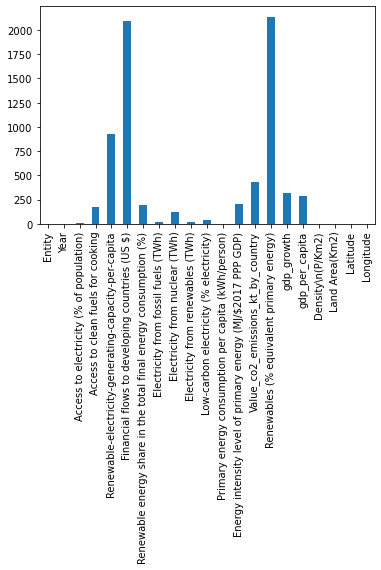

In [8]:
df.isna().sum().plot(kind = 'bar') #To bisualizae the null values as histrogram

In [9]:
# Finding duplicate rows
duplicate_rows = df[df.duplicated(keep='first')]

# Number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Displaying the duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")
duplicate_rows

Number of duplicate rows: 0


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude


In [10]:
df.nunique() #finding unique rows

Entity                                                               176
Year                                                                  21
Access to electricity (% of population)                             2040
Access to clean fuels for cooking                                    896
Renewable-electricity-generating-capacity-per-capita                2110
Financial flows to developing countries (US $)                      1017
Renewable energy share in the total final energy consumption (%)    2587
Electricity from fossil fuels (TWh)                                 1859
Electricity from nuclear (TWh)                                       547
Electricity from renewables (TWh)                                   1533
Low-carbon electricity (% electricity)                              2647
Primary energy consumption per capita (kWh/person)                  3628
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         1044
Value_co2_emissions_kt_by_country                  

In [26]:
df.rename(columns={"Value_co2_emissions_kt_by_country":"CO2" , 'Land Area(Km2)':'Land'} , inplace=True) #To make it easier later

In [13]:
import arcpy #Initializing Arcpy

arcpy.env.overwriteOutput = True

arcpy.env.workspace = r"C:\Users\nismayil\OneDrive - Texas Tech University\GeoStatistics\Final Project"

In [14]:
gdb_name = "final.gdb" #Setting final project gdb

gdb_path = r"C:\Users\nismayil\OneDrive - Texas Tech University\GeoStatistics\Final Project"

arcpy.CreateFileGDB_management(gdb_path, gdb_name)

<Result 'C:\\Users\\nismayil\\OneDrive - Texas Tech University\\GeoStatistics\\Final Project\\final.gdb'>

In [15]:
arcpy.env.workspace = r"C:\Users\nismayil\OneDrive - Texas Tech University\GeoStatistics\Final Project\final.gdb"


in_table = r"C:/Users/nismayil/OneDrive - Texas Tech University/GeoStatistics/Final Project/global-data-on-sustainable-energy (1).csv"
out_feature_class = "points"
x_coords = "Longitude"
y_coords = "Latitude"

# Creating XY table for Lat and Lon values
arcpy.management.XYTableToPoint(in_table, out_feature_class,x_coords, y_coords,"" ,arcpy.SpatialReference(4759, 115700))

# Print the total rows
print(arcpy.management.GetCount(out_feature_class))

3649


Text(0.5, 1.0, 'Top 5 Countries with the Highest fossil fuels consumption')

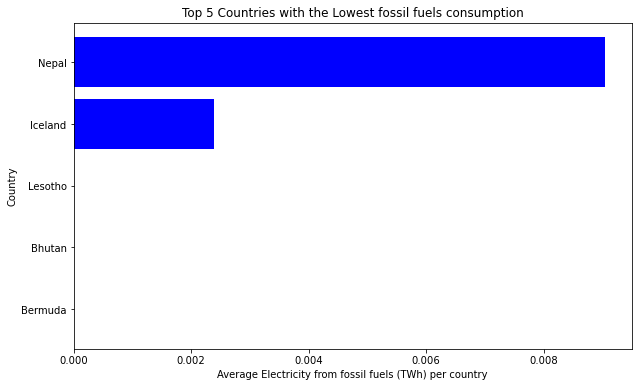

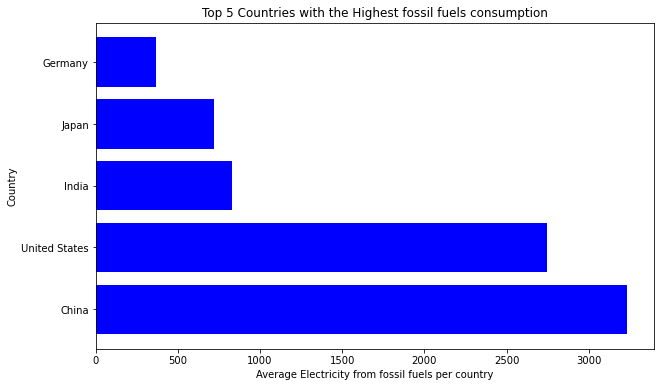

In [20]:
#Finding the fossil fuel generation per country for the top 5 max and min values

fossil = df.groupby('Entity')['Electricity from fossil fuels (TWh)'].mean()


top_5_HIGH_fossil = fossil.nlargest(5)
top_5_LOW_fossil = fossil.nsmallest(5)


plt.figure(figsize=(10, 6))
plt.barh(top_5_LOW_fossil.index, top_5_LOW_fossil.values, color='blue')  # You can change the color if needed
plt.xlabel('Average Electricity from fossil fuels (TWh) per country')
plt.ylabel('Country')
plt.title('Top 5 Countries with the Lowest fossil fuels consumption')



plt.figure(figsize=(10, 6))
plt.barh(top_5_HIGH_fossil.index, top_5_HIGH_fossil.values, color='blue')  # You can change the color if needed
plt.xlabel('Average Electricity from fossil fuels per country')
plt.ylabel('Country')
plt.title('Top 5 Countries with the Highest fossil fuels consumption')


Text(0.5, 1.0, 'Top 5 Countries with the Highest renewables consumption')

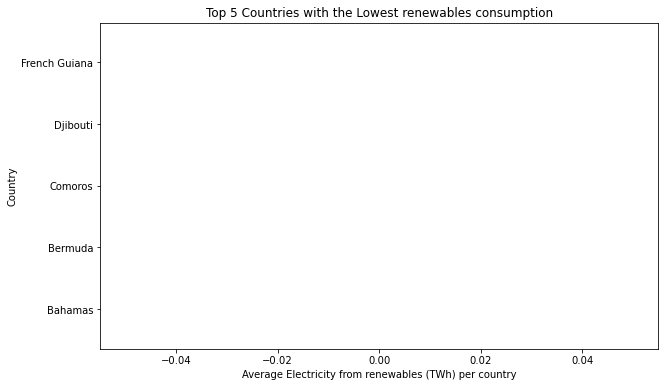

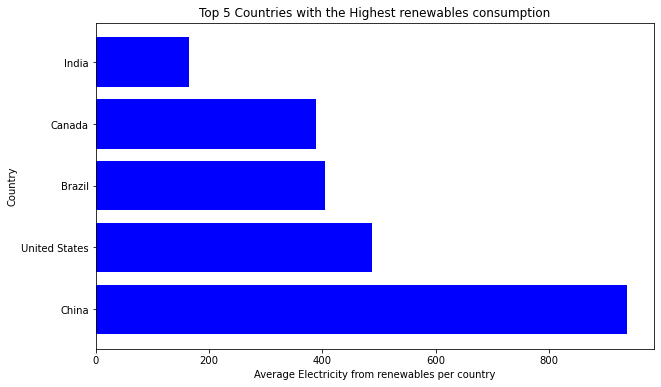

In [19]:
#Fiding top 5 max and min renewable energy user countries
renewable = df.groupby('Entity')['Electricity from renewables (TWh)'].mean()

df['Electricity from renewables (TWh)'].dropna()
top_5_HIGH_rn = renewable.nlargest(5)
top_5_LOW_rn = renewable.nsmallest(5)

plt.figure(figsize=(10, 6))
plt.barh(top_5_LOW_rn.index, top_5_LOW_rn.values, color='blue')  # You can change the color if needed
plt.xlabel('Average Electricity from renewables (TWh) per country')
plt.ylabel('Country')
plt.title('Top 5 Countries with the Lowest renewables consumption')

plt.figure(figsize=(10, 6))
plt.barh(top_5_HIGH_rn.index, top_5_HIGH_rn.values, color='blue')  # You can change the color if needed
plt.xlabel('Average Electricity from renewables per country')
plt.ylabel('Country')
plt.title('Top 5 Countries with the Highest renewables consumption')

In [43]:
import arcpy


arcpy.env.workspace = r"C:\Users\nismayil\OneDrive - Texas Tech University\GeoStatistics\Final Project\final.gdb"
feature_class = "points"

#Using SearchCursor to read the rows and calulate the values of average CO2 emissions
with arcpy.da.SearchCursor(feature_class, ["Entity", "Value_co2_emissions_kt_by_country"]) as cursor:
    current_country = None
    total_emissions = 0
    count = 1

    for row in cursor:
        country = row[0]
        co2_emissions = row[1]

        # Check if the country has changed and if the emissions value is not None
        if current_country != country and co2_emissions is not None:
            # Print the average for the previous country
            average_emissions = total_emissions / count
            print(f"Country: {current_country}, Average CO2 Emissions = {average_emissions} metric tons per capita")

            # Reset variables for the new country
            current_country = country
            total_emissions = co2_emissions if co2_emissions is not None else 0
            count = 1



Country: None, Average CO2 Emissions = 0.0 metric tons per capita
Country: Afghanistan, Average CO2 Emissions = 760.0 metric tons per capita
Country: Albania, Average CO2 Emissions = 3170.0 metric tons per capita
Country: Algeria, Average CO2 Emissions = 80050.0 metric tons per capita
Country: Angola, Average CO2 Emissions = 16200.0 metric tons per capita
Country: Antigua and Barbuda, Average CO2 Emissions = 330.0 metric tons per capita
Country: Argentina, Average CO2 Emissions = 132270.0 metric tons per capita
Country: Armenia, Average CO2 Emissions = 3560.0 metric tons per capita
Country: Aruba, Average CO2 Emissions = 2379.883 metric tons per capita
Country: Australia, Average CO2 Emissions = 339450.0 metric tons per capita
Country: Austria, Average CO2 Emissions = 63530.0 metric tons per capita
Country: Azerbaijan, Average CO2 Emissions = 27690.0 metric tons per capita
Country: Bahrain, Average CO2 Emissions = 15880.0 metric tons per capita
Country: Bangladesh, Average CO2 Emission

Text(0.5, 1.0, 'Top 5 Countries with the Highest CO2 consumption')

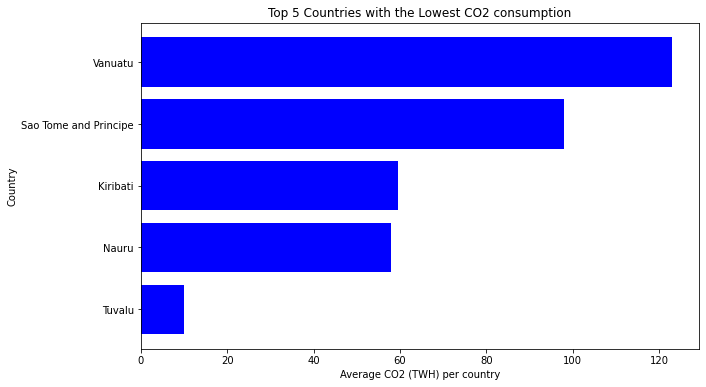

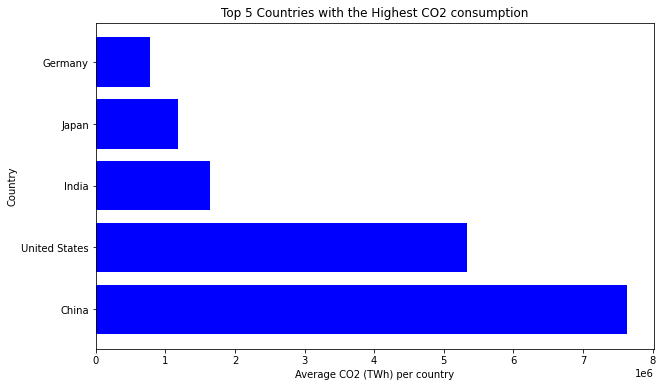

In [11]:
#Appying python to see CO2 values
CO2 = df.groupby('Entity')['CO2'].mean()


top_5_HIGH_CO2 = CO2.nlargest(5)
top_5_LOW_CO2 = CO2.nsmallest(5)


plt.figure(figsize=(10, 6))
plt.barh(top_5_LOW_CO2.index, top_5_LOW_CO2.values, color='blue')  # You can change the color if needed
plt.xlabel('Average CO2 (TWH) per country')
plt.ylabel('Country')
plt.title('Top 5 Countries with the Lowest CO2 consumption')



plt.figure(figsize=(10, 6))
plt.barh(top_5_HIGH_CO2.index, top_5_HIGH_CO2.values, color='blue')  # You can change the color if needed
plt.xlabel('Average CO2 (TWh) per country')
plt.ylabel('Country')
plt.title('Top 5 Countries with the Highest CO2 consumption')


In [21]:
co2_data = df[['Entity', 'Year', 'CO2']] #new dataset created
# United States DataFrame with dropped missing values
co2_data_united_states = co2_data[(co2_data['Entity'] == 'United States')].dropna()
co2_data_china = co2_data[(co2_data['Entity'] == 'China')].dropna()

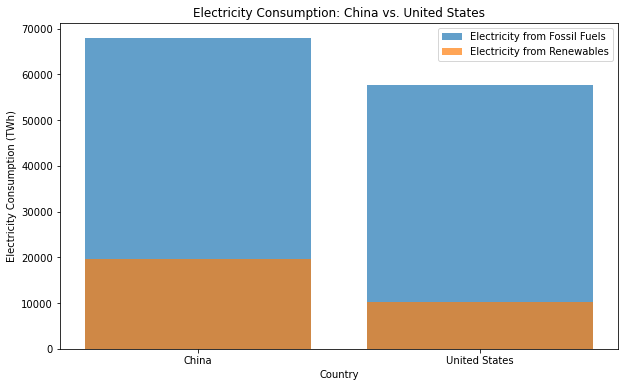

In [14]:
relevant_columns = [
    'Entity',
    'Year',
    'Electricity from fossil fuels (TWh)',
    'Electricity from renewables (TWh)'
]
filtered_data = df[relevant_columns]

# Filter data for China and the United States only
filtered_data = filtered_data[filtered_data['Entity'].isin(['China', 'United States'])]

# Group by country and sum electricity values over the years
grouped_data = filtered_data.groupby('Entity').sum()

# Plotting sum of electricity from fossils and renewables for China and the United States
plt.figure(figsize=(10, 6))
plt.bar(
    grouped_data.index,  # Use index as x-axis
    grouped_data['Electricity from fossil fuels (TWh)'],
    label='Electricity from Fossil Fuels',
    alpha=0.7
)

plt.bar(
    grouped_data.index,  # Use index as x-axis
    grouped_data['Electricity from renewables (TWh)'],
    label='Electricity from Renewables',
    alpha=0.7
)

plt.title('Electricity Consumption: China vs. United States')
plt.xlabel('Country')
plt.ylabel('Electricity Consumption (TWh)')
plt.legend()



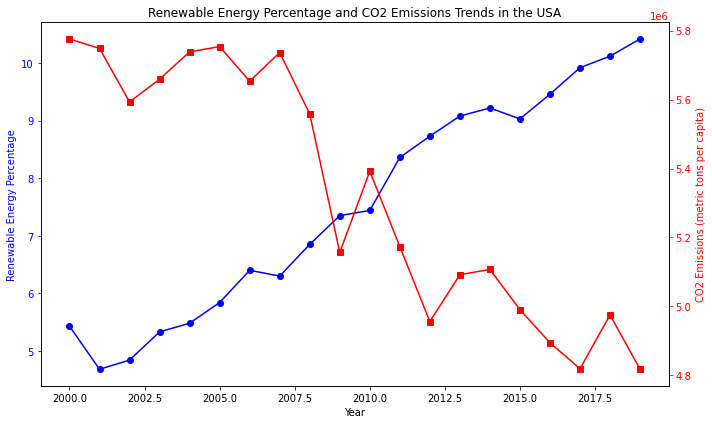

In [22]:
relevant_columns = [
    'Entity',
    'Year',
    'Renewable energy share in the total final energy consumption (%)',
    'CO2'
]
filtered_data = df[relevant_columns]

# Filtering data for the United States only
usa_data = filtered_data[filtered_data['Entity'] == 'United States']

# Plotting trends for renewable energy percentage and CO2 emissions in the USA
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting renewable energy percentage
ax1.plot(usa_data['Year'], usa_data['Renewable energy share in the total final energy consumption (%)'], color='b', marker='o', label='Renewable Energy Percentage')
ax1.set_xlabel('Year')
ax1.set_ylabel('Renewable Energy Percentage', color='b')
ax1.tick_params('y', colors='b')

# Creating a second y-axis for CO2 emissions
ax2 = ax1.twinx()
ax2.plot(usa_data['Year'], usa_data['CO2'], color='r', marker='s', label='CO2 Emissions')
ax2.set_ylabel('CO2 Emissions (metric tons per capita)', color='r')
ax2.tick_params('y', colors='r')

plt.title('Renewable Energy Percentage and CO2 Emissions Trends in the USA')
fig.tight_layout()

